In [114]:
library(tidyverse)
library(forcats)
library(lubridate)
load("gss.RData")
options(repr.plot.height=3, repr.plot.width=4)

In [115]:
head(gss)

  AGE RELIG      DENOM              PARTYID          RINCOME GOODLIFE
1 23  JEWISH     NA                 IND,NEAR DEM     NA      NA      
2 70  CATHOLIC   NA                 NOT STR DEMOCRAT NA      NA      
3 48  PROTESTANT METHODIST-DK WHICH INDEPENDENT      NA      NA      
4 27  OTHER      NA                 NOT STR DEMOCRAT NA      NA      
5 61  PROTESTANT METHODIST-DK WHICH STRONG DEMOCRAT  NA      NA      
6 26  PROTESTANT EPISCOPAL          IND,NEAR DEM     NA      NA      
  SATFIN         HOMOSEX CONPRESS CONFED CONSCI CONFINAY CONCLERG
1 NOT AT ALL SAT NA      NA       NA     NA     NA       NA      
2 MORE OR LESS   NA      NA       NA     NA     NA       NA      
3 SATISFIED      NA      NA       NA     NA     NA       NA      
4 NOT AT ALL SAT NA      NA       NA     NA     NA       NA      
5 SATISFIED      NA      NA       NA     NA     NA       NA      
6 MORE OR LESS   NA      NA       NA     NA     NA       NA      

In [118]:
load("gss2.RData")
head(gss)

  YEAR PARTYID          AGE RELIG      DENOM              RACE  GOODLIFE
1 1972 IND,NEAR DEM     23  JEWISH     NA                 WHITE NA      
2 1972 NOT STR DEMOCRAT 70  CATHOLIC   NA                 WHITE NA      
3 1972 INDEPENDENT      48  PROTESTANT METHODIST-DK WHICH WHITE NA      
4 1972 NOT STR DEMOCRAT 27  OTHER      NA                 WHITE NA      
5 1972 STRONG DEMOCRAT  61  PROTESTANT METHODIST-DK WHICH WHITE NA      
6 1972 IND,NEAR DEM     26  PROTESTANT EPISCOPAL          WHITE NA      
  RINCOME CONTEMP CONFINAN ⋯ CONGOVT CONCHURH CONCOURT CONSCHLS CONDOM CONINC
1 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     25926 
2 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     33333 
3 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     33333 
4 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     41667 
5 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     69444 
6 NA      NA      NA 

In [78]:
load('gss2.RData')

In [93]:
by_year <- gss %>% count(YEAR, PARTYID) 
by_year <- filter(by_year, !is.na(PARTYID))
by_year <- by_year %>% group_by(YEAR) %>% mutate(p=n / sum(n)) %>% print

# A tibble: 248 x 4
# Groups:   YEAR [31]
    YEAR PARTYID                n      p
   <dbl> <fct>              <int>  <dbl>
 1  1972 STRONG DEMOCRAT      326 0.203 
 2  1972 NOT STR DEMOCRAT     436 0.271 
 3  1972 IND,NEAR DEM         160 0.0996
 4  1972 INDEPENDENT          159 0.0989
 5  1972 IND,NEAR REP         100 0.0622
 6  1972 NOT STR REPUBLICAN   231 0.144 
 7  1972 STRONG REPUBLICAN    126 0.0784
 8  1972 OTHER PARTY           69 0.0429
 9  1973 STRONG DEMOCRAT      231 0.155 
10  1973 NOT STR DEMOCRAT     383 0.257 
# ... with 238 more rows


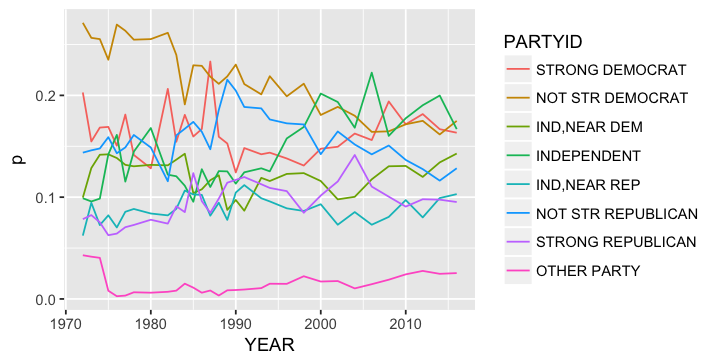

In [94]:
options(repr.plot.width=6)
by_year %>% ggplot + geom_line(aes(x=YEAR, y=p, color=PARTYID))

In [107]:
by_year <- mutate(gss, PARTYID=fct_collapse(PARTYID,
                                         "DEM"=c("STRONG DEMOCRAT", "NOT STR DEMOCRAT"),
                                         "IND"=c("IND,NEAR DEM", "INDEPENDENT", "IND,NEAR REP"),
                                         "REP"=c("NOT STR REPUBLICAN", "STRONG REPUBLICAN")
                                         ))
by_year <- by_year %>% count(YEAR, PARTYID) 
by_year <- filter(by_year, !is.na(PARTYID))
by_year <- by_year %>% group_by(YEAR) %>% mutate(p=n / sum(n)) %>% print

# A tibble: 124 x 4
# Groups:   YEAR [31]
    YEAR PARTYID         n      p
   <dbl> <fct>       <int>  <dbl>
 1  1972 DEM           762 0.474 
 2  1972 IND           419 0.261 
 3  1972 REP           357 0.222 
 4  1972 OTHER PARTY    69 0.0429
 5  1973 DEM           614 0.411 
 6  1973 IND           476 0.319 
 7  1973 REP           341 0.228 
 8  1973 OTHER PARTY    62 0.0415
 9  1974 DEM           619 0.424 
10  1974 IND           457 0.313 
# ... with 114 more rows


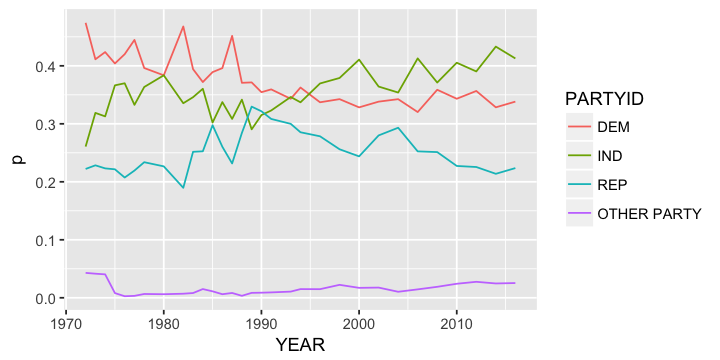

In [108]:
by_year %>% ggplot + geom_line(aes(x=YEAR, y=p, color=PARTYID))

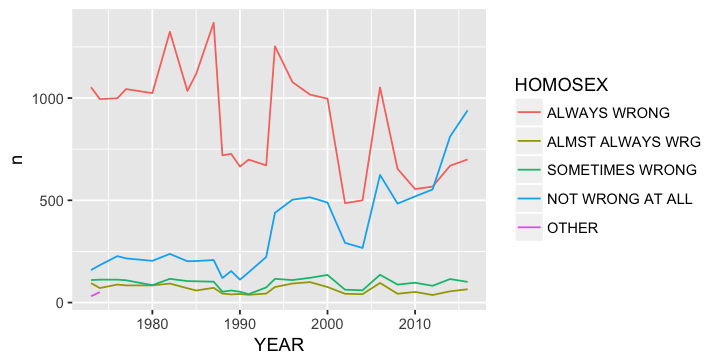

In [113]:
gss %>% filter(!is.na(HOMOSEX)) %>% count(YEAR, HOMOSEX) %>% 
     ggplot + geom_line(aes(x=YEAR, y=n, color=HOMOSEX))

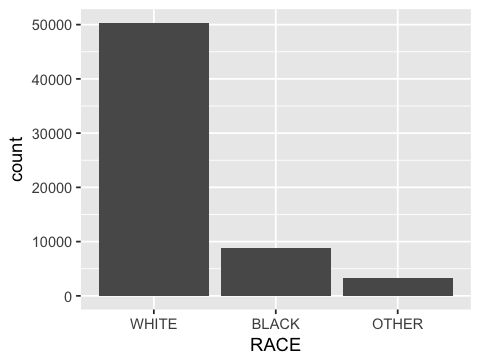

In [120]:
ggplot(gss) + geom_bar(aes(x=RACE))

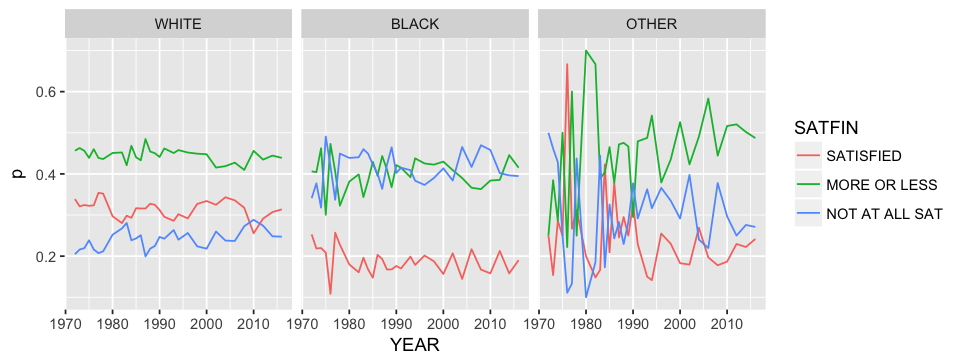

In [138]:
options(repr.plot.width=8)
gss %>% filter(!is.na(SATFIN)) %>% 
count(YEAR, SATFIN, RACE) %>% group_by(YEAR, RACE) %>% mutate(p=n/sum(n)) %>%
ggplot + geom_line(aes(x=YEAR, y=p, color=SATFIN)) + facet_wrap(~ RACE)

In [137]:
head(gss)

  YEAR PARTYID          AGE RELIG      DENOM              RACE  GOODLIFE
1 1972 IND,NEAR DEM     23  JEWISH     NA                 WHITE NA      
2 1972 NOT STR DEMOCRAT 70  CATHOLIC   NA                 WHITE NA      
3 1972 INDEPENDENT      48  PROTESTANT METHODIST-DK WHICH WHITE NA      
4 1972 NOT STR DEMOCRAT 27  OTHER      NA                 WHITE NA      
5 1972 STRONG DEMOCRAT  61  PROTESTANT METHODIST-DK WHICH WHITE NA      
6 1972 IND,NEAR DEM     26  PROTESTANT EPISCOPAL          WHITE NA      
  RINCOME CONTEMP CONFINAN ⋯ CONGOVT CONCHURH CONCOURT CONSCHLS CONDOM CONINC
1 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     25926 
2 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     33333 
3 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     33333 
4 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     41667 
5 NA      NA      NA       ⋯ NA      NA       NA       NA       NA     69444 
6 NA      NA      NA 